In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [13]:
os.environ["OMP_NUM_THREADS"] = "1"

# Load the data

In [14]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge customer and transaction data on common identifier

In [15]:
merged_data = pd.merge(customers, transactions, on='CustomerID', how='inner')

In [16]:
features = merged_data.select_dtypes(include=[np.number])

# Scale the features

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering with KMeans and calculating Davies-Bouldin Index

In [18]:
range_n_clusters = range(2, 11)
db_scores = []
inertia = []

In [19]:
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_features)
    
    # Compute Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, cluster_labels)
    db_scores.append(db_index)
    
    # Compute inertia for elbow method
    inertia.append(kmeans.inertia_)

# Plot Davies-Bouldin Index vs. Number of Clusters

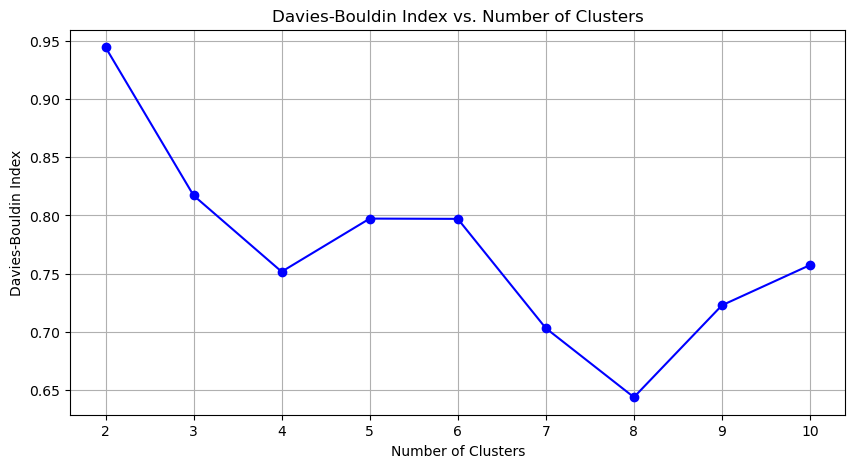

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, db_scores, marker='o', linestyle='-', color='b')
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid()
plt.show()

# Plot Elbow Curve for Inertia

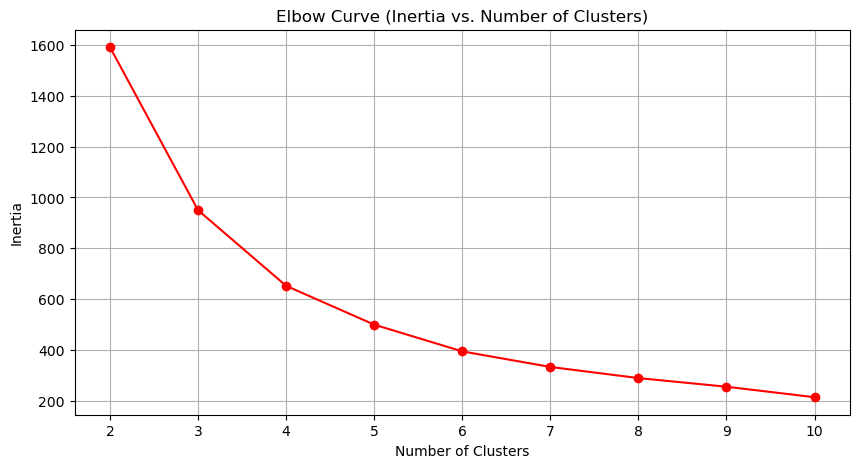

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='-', color='r')
plt.title("Elbow Curve (Inertia vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [22]:
print("Davies-Bouldin Scores for each cluster size:", db_scores)
print("Inertia values for each cluster size:", inertia)


Davies-Bouldin Scores for each cluster size: [0.9442477624220227, 0.8170978638768145, 0.7517439301142246, 0.7972692840585559, 0.7970380384235737, 0.7032491744348744, 0.644068825312793, 0.7229259587097555, 0.7574187526433285]
Inertia values for each cluster size: [1591.7506834095266, 949.7342076875426, 651.9846676672953, 499.14522929649263, 393.88290540245526, 332.55403596999025, 288.7218470565755, 254.6765030436395, 213.32468805691943]


In [23]:
optimal_clusters = range_n_clusters[np.argmin(db_scores)]
print(f"Optimal number of clusters based on DB Index: {optimal_clusters}")

Optimal number of clusters based on DB Index: 8


# Fit the final model with the optimal number of clusters

In [24]:
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(scaled_features)

In [25]:
merged_data['Cluster'] = final_labels


# Save the clustered data to a CSV

In [26]:
merged_data.to_csv("Clustered_Customers.csv", index=False)
print("Clustered data saved to 'Clustered_Customers.csv'.")

Clustered data saved to 'Clustered_Customers.csv'.
